In [1]:
import glob
import pprint
import numpy as np
import pandas as pd
from sonata.circuit import File
from pathlib import Path

path_v1_nodes = Path(r"GLIF Network\network\v1_nodes.h5")
path_v1_nodes_types = Path(r"GLIF Network\network\v1_node_types.csv")
path_v1_edges = Path(r"GLIF Network\network\v1_v1_edges.h5")
path_v1_edges_types = Path(r"GLIF Network\network\v1_v1_edge_types.csv")

In [2]:
# Use one network file
net = File(data_files=[path_v1_nodes, path_v1_edges], 
           data_type_files=[path_v1_nodes_types, path_v1_edges_types])
print('Contains nodes: {}'.format(net.has_nodes))
print('Contains edges: {}'.format(net.has_edges))

Contains nodes: True
Contains edges: True


In [3]:
v1_nodes = net.nodes['v1']
v1_nodes[0] ### DO NOT DO THIS - row's not necessarily the same as node_id per sonata documentation
v1_nodes.get_node_id(0) # Do this

{'model_type': 'point_process', 'model_template': 'nest:glif_lif_asc_psc', 'dynamics_params': '488419491_glif_lif_asc_config.json', 'pop_name': 'e5Rbp4', 'gaba_synapse': None, 'ei': 'e', 'location': 'Cortex', 'population': 'v1', 'node_type_id': 488419491, tuning_angle: 0.0, x: 110.906706392, y: -431.668135698, z: 623.732699778, 'node_id': 0}

In [4]:
df = v1_nodes.to_dataframe()
df.head()

,node_type_id,node_id,tuning_angle,x,y,z,model_type,model_template,dynamics_params,pop_name,gaba_synapse,ei,location,population
0,488419491,0,0.000000,110.906706,-431.668136,623.732700,point_process,nest:glif_lif_asc_psc,488419491_glif_lif_asc_config.json,e5Rbp4,NaN,e,Cortex,v1
1,471129934,1,0.017278,526.329919,-564.693981,-555.341582,point_process,nest:glif_lif_asc_psc,471129934_glif_lif_asc_config.json,e5Rbp4,NaN,e,Cortex,v1
2,488419491,2,0.034556,197.897567,-505.737886,709.692990,point_process,nest:glif_lif_asc_psc,488419491_glif_lif_asc_config.json,e5Rbp4,NaN,e,Cortex,v1
3,486052980,3,0.051833,400.302561,-465.458859,-224.639993,point_process,nest:glif_lif_asc_psc,486052980_glif_lif_asc_config.json,e5Rbp4,NaN,e,Cortex,v1
4,471129934,4,0.069111,-766.751467,-556.178476,55.929619,point_process,nest:glif_lif_asc_psc,471129934_glif_lif_asc_config.json,e5Rbp4,NaN,e,Cortex,v1


In [5]:
group = v1_nodes.get_group(v1_nodes.group_ids[0])
num_nodes = len(group)

In [6]:
recurrent_edges = net.edges['v1_to_v1']

# Test with subset of neurons

In [7]:
test_node_ids = np.arange(0, num_nodes, 10000)


In [8]:
group[test_node_ids]

{tuning_angle: array([  0.        , 172.77788443, 345.55576886,  26.18151633,
        109.19203099, 192.20254566, 275.21306032, 358.22357499,
        277.63889984,  83.47972973, 212.6953125 ,  17.96545106,
        291.50973851, 139.83208131,  20.9948542 ,   0.67876502,
         27.95763994,  91.23633305, 175.44480671,  27.58483755,
        108.81227437, 190.03971119, 271.26714801, 352.49458484]),
 x: array([ 110.90670639, -438.66998276,  239.35428611,  574.10818346,
         -50.66001728, -676.50432845, -532.85158137,  309.68864798,
          54.05242741,  627.77371459,  261.13189898,  -41.10577103,
        -626.74449817,  451.06704993,  767.99366814,  443.26495778,
         297.53627614, -492.34767062,  217.63333392,   62.10947478,
         793.84139183, -301.62643184, -761.0497183 ,   64.8524343 ]),
 y: array([-431.6681357 , -565.12279812, -582.13508288, -266.89418775,
        -299.82520751, -208.32573404, -209.07538297, -261.185533  ,
        -245.31299149, -310.46516191, -428.82148

In [9]:
test_node_ids

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
       160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000])

In [10]:
# model = GeNNModel("float", "v1_alone")
# model.add_neuron_population("v1_pop", len(test_node_ids), "TraubMiles", p, ini)
# model.add_synapse_population(    pop_name = "v1_pop_self",
#     matrix_type,
#     delay_steps,
#     source,
#     target,
#     w_update_model,
#     wu_param_space,
#     wu_var_space,
#     wu_pre_var_space,
#     wu_post_var_space,
#     postsyn_model,
#     ps_param_space,
#     ps_var_space,
#     connectivity_initialiser=None,
# )


SyntaxError: positional argument follows keyword argument (3067970592.py, line 4)

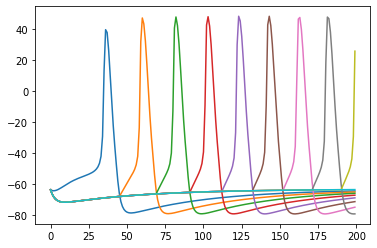

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from pygenn.genn_model import (GeNNModel, init_connectivity, create_cmlf_class,
                               create_custom_sparse_connect_init_snippet_class)
from pygenn.genn_wrapper import NO_DELAY
ring_model = create_custom_sparse_connect_init_snippet_class(
    "ring",
    row_build_code=
        """
        $(addSynapse, ($(id_pre) + 1) % $(num_post));
        $(endRow);
        """,
    calc_max_row_len_func=create_cmlf_class(
        lambda num_pre, num_post, pars: 1)())
model = GeNNModel("float", "tenHHRing")
model.dT = 0.1
p = {"gNa": 7.15,   # Na conductance in [muS]
     "ENa": 50.0,   # Na equi potential [mV]
     "gK": 1.43,    # K conductance in [muS]
     "EK": -95.0,   # K equi potential [mV] 
     "gl": 0.02672, # leak conductance [muS]
     "El": -63.563, # El: leak equi potential in mV, 
     "C": 0.143}    # membr. capacity density in nF
ini = {"V": -60.0,      # membrane potential
       "m": 0.0529324,  # prob. for Na channel activation
       "h": 0.3176767,  # prob. for not Na channel blocking
       "n": 0.5961207}  # prob. for K channel activation
s_ini = {"g": -0.2}
ps_p = {"tau": 1.0, # Decay time constant [ms] 
        "E": -80.0} # Reversal potential [mV]
stim_ini = {"startSpike": [0], "endSpike": [1]}
pop1 = model.add_neuron_population("Pop1", 10, "TraubMiles", p, ini)
stim = model.add_neuron_population("Stim", 1, "SpikeSourceArray", {}, stim_ini)
model.add_synapse_population("Pop1self", "SPARSE_GLOBALG", 10,
    pop1, pop1,
    "StaticPulse", {}, s_ini, {}, {},
    "ExpCond", ps_p, {},
    init_connectivity(ring_model, {}))
model.add_synapse_population("StimPop1", "SPARSE_GLOBALG", NO_DELAY,
    stim, pop1,
    "StaticPulse", {}, s_ini, {}, {},
    "ExpCond", ps_p, {},
    init_connectivity("OneToOne", {}))
stim.set_extra_global_param("spikeTimes", [0.0])
model.build()
model.load()
v = np.empty((2000, 10))
v_view = pop1.vars["V"].view
while model.t < 200.0:
    model.step_time()
    pop1.pull_var_from_device("V")
    
    v[model.timestep - 1,:]=v_view[:]
fig, axis = plt.subplots()
axis.plot(v[:200,:])
plt.show()

In [12]:

model.add_synapse_population?

Object `model.add_synapse_population` not found.
